In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('BankMarketingDataSet.csv', sep=';')

In [3]:
dataset.describe()

,id,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,2060.000000,40.113620,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,1189.197208,10.313362,1.563114,0.579349,4.594578,1.733591,73.667904
min,1.000000,18.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,1030.500000,32.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,2060.000000,38.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,3089.500000,47.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,4119.000000,88.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
dataset.head()

,id,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,30,blue-collar,married,basic.9y,no,yes,no,-1.8,92.893,-46.2,1.313,5099.1,no
1,2,39,services,single,high.school,no,no,no,1.1,93.994,-36.4,4.855,5191.0,no
2,3,25,services,married,high.school,no,yes,no,1.4,94.465,-41.8,4.962,5228.1,no
3,4,38,services,married,basic.9y,no,unknown,unknown,1.4,94.465,-41.8,4.959,5228.1,no
4,5,47,admin.,married,university.degree,no,yes,no,-0.1,93.200,-42.0,4.191,5195.8,no


# Analisi

In [5]:
# 2.

# il dataset contiene 4119 istanze

In [7]:
dataset.isnull().any()

id                False
age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [8]:
# non sono presenti valori nulli all'interno del dataset

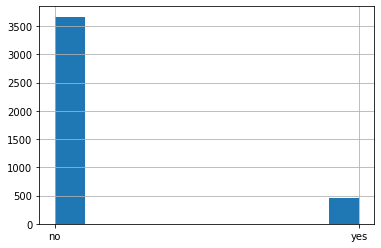

In [12]:
dataset['y'].hist()

In [13]:
# il dataset è fortemente sbilanciato per la classe da predire, sono infatti presenti molte più istanze
# con valore 'no' rispetto a quelle con valore 'yes'

In [14]:
# 3.

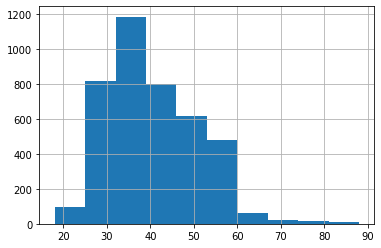

In [15]:
dataset['age'].hist()

In [16]:
# 4.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66a806acd0>,
      dtype=object)

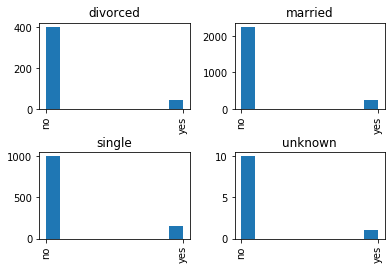

In [20]:
dataset['y'].hist(by=dataset['marital'])

In [30]:
# l'attributo 'marital' non influisce sulla predizione, è infatti possibile notare come la distribuzione delle
# due classi dell'attributo 'y' non cambi tenendo conto del solo attributo 'marital' rispetto alla distribuzione
# globale sul dataset. Questo implica che un singolo valore dell'attributo non determina uno sbilanciamento del
# valore di 'y'.

In [ ]:
# 5.

In [53]:
age_loan = (dataset.loc[dataset['loan'] == 'yes'].groupby(['age'])['id'].count() / dataset.shape[0])
age_no_loan = (dataset.loc[dataset['loan'] == 'no'].groupby(['age'])['id'].count() / dataset.shape[0])

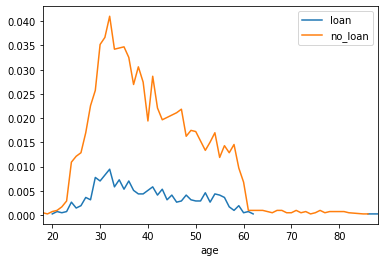

In [77]:
pd.DataFrame([age_loan, age_no_loan], index=['loan', 'no_loan']).T.plot()

In [ ]:
# in generale per ogni età è di gran lunga la percentuale di individui che non hanno sottoscritto un prestito.
# Non si evidenziano casi particolari legati all'età, infatti l'andamento tra chi ha sottoscritto un prestito
# e chi non lo ha fatto è lo stesso per età.

# Trasformazione e Predizione

In [68]:
# 1.

In [84]:
skds = dataset.copy(deep=True)
skds.select_dtypes(exclude=['number'])

,job,marital,education,default,housing,loan,y
0,blue-collar,married,basic.9y,no,yes,no,no
1,services,single,high.school,no,no,no,no
2,services,married,high.school,no,yes,no,no
3,services,married,basic.9y,no,unknown,unknown,no
4,admin.,married,university.degree,no,yes,no,no
...,...,...,...,...,...,...,...
4114,admin.,married,basic.6y,no,yes,yes,no
4115,admin.,married,high.school,no,yes,no,no
4116,student,single,high.school,no,no,no,no
4117,admin.,married,high.school,no,no,no,no
